<a href="https://colab.research.google.com/github/andiainundzariah/segmentasi/blob/master/Dataset5050.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#untuk menghubungkan colab ke drive

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd #library yg digunakan untk load data set
import numpy as np  #library yg digunakan untk load data set
import os           #library yg digunakan untk load data set serta pengolahan dlm bentuk array

import matplotlib.pyplot as plt #library untuk visualisasi data, untu mmbuat grafik
import cv2    #mengolah data citra dikenal dngn opencv

#library ini ada didlm stckt learn
from sklearn.model_selection import train_test_split  #digunakn untuk membgi data training dan dta testing
from sklearn.preprocessing import StandardScaler      #untuk mrubh skala nilainya
from sklearn.neighbors import KNeighborsClassifier    #library untk knn

#library yg dgunakan untk mnghitung nilai performa
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

import math
#library untuk mengolah data/ blm pasti 
from skimage import io
from skimage import feature

In [3]:
pneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Pneumonia/')
print(pneumonia_data[:3])   #untuk mncetak hanya dta 3 trkhir sja
print(len(pneumonia_data)) #untuk mngethui bnyknya dt dlm vat

print('\n')
tidakPneumonia_data = os.listdir('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia/')
print(tidakPneumonia_data[:3])
print(len(tidakPneumonia_data))

['person26_bacteria_122.jpeg', 'person63_bacteria_306.jpeg', 'person69_bacteria_338.jpeg']
500


['IM-0656-0001.jpeg', 'IM-0655-0001.jpeg', 'IM-0652-0001-0002.jpeg']
500


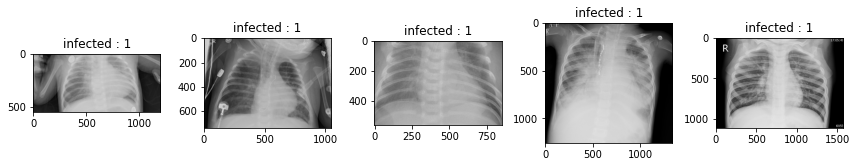

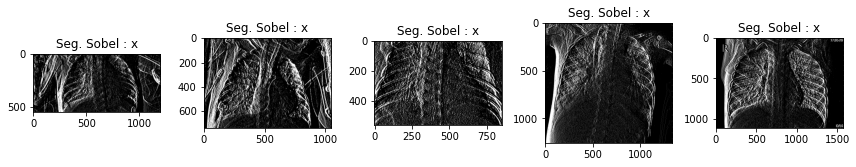

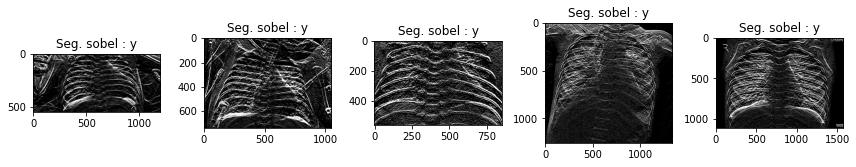

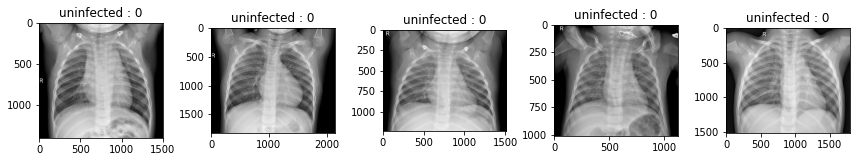

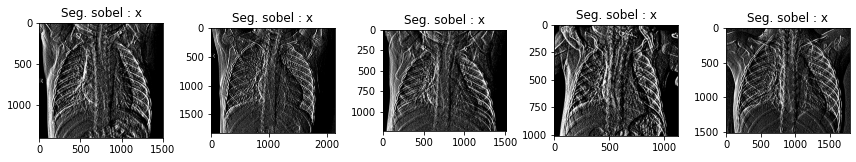

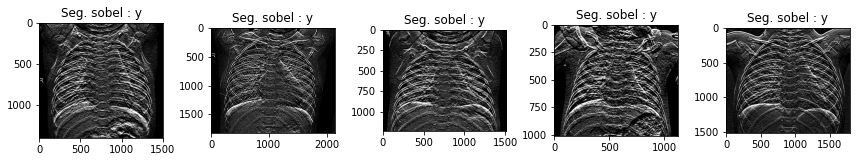

In [5]:
#Tahap ini hanya utk Visualisasi Citra Penyakit Pneumonia
#library matplotlib, hanya u/ visualisasi

#data asli pneumonia
plt.figure(figsize = (12,12))                #mengatur skala citra yg ditmpilkan dengan skala 12 12
for i in range(5):                           #melakukan perulangan sbnyk 5X (dgn nilai awal i=0 sampai i=4)
    plt.subplot(1, 5, i+1)                   #plot letak citra, librry cv2
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    plt.imshow(img)               #menanmpilkan data dlm format abu2
    plt.title('infected : 1')                  #pmbrian title, 1 itu memberikan nilai actual bahwa terinfeksi itu = 1
    plt.tight_layout()                        #tampilannya disesuaikan dgn lebar layar


#data sobel x pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
    img = cv2.GaussianBlur (gray, (3,3),0)   
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)           #proses segmentasi sobel 
    plt.imshow(edges, cmap='gray')
    plt.title('Seg. Sobel : x')
    plt.tight_layout()


#data sobel y
plt.figure(figsize= (12,12))
for i in range (5):
  plt.subplot(1, 5, i+1)
  img = cv2.imread ('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" +pneumonia_data[i])
  gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
  img = cv2.GaussianBlur (gray, (3,3),0)
  edges = cv2.Sobel(img, cv2.CV_8U,0,1, ksize=5)
  plt.imshow(edges, cmap='gray')
  plt.title ('Seg. sobel : y')
  plt.tight_layout()



#Tahap Visualisasi Citra Tidak Pneumonia
#data asli tdk pneumonia
plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    plt.imshow(img)
    plt.title('uninfected : 0')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,1,0, ksize=5)
    plt.imshow(edges, cmap='gray')
    plt.title('Seg. sobel : x')
    plt.tight_layout()

plt.figure(figsize = (12,12))
for i in range(5):
    plt.subplot(1, 5, i+1)
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor (img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur (gray, (3,3),0)
    edges = cv2.Sobel(img, cv2.CV_8U,0,1, ksize=5)
    plt.imshow(edges, cmap='gray')
    plt.title('Seg. sobel : y')
    plt.tight_layout()
    
plt.show()

In [0]:

#SEGMENTASI SOBEL DAN EKSTRAKSI HUMOMENT

x = np.array([['H1','H2','H3','H4','H5','H6','H7','Actual']])    #deklarasi var (x), isi datanya nnti sebagai header file .csv

#Proses Citra Pneumonia
for i in range(len(pneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Pneumonia' + "/" + pneumonia_data[i])
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,1)
    x = np.vstack((x,a))

#Proses Citra Tidak Pneumonia
for i in range(len(tidakPneumonia_data)):
    img = cv2.imread('/content/drive/My Drive/Dataset/DATA5050/Tidak Pneumonia' + "/" + tidakPneumonia_data[i])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.GaussianBlur(gray,(3,3),0)
    edges = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)
    a = cv2.HuMoments(cv2.moments(edges)).flatten()
    a = np.append(a,0)
    x = np.vstack((x,a))

In [0]:
#EXPORT to CSV
np.savetxt("/content/drive/My Drive/Dataset/coba8ux.csv", x, fmt='%s',delimiter=',' )

In [8]:
#LOAD CSV DATASET

dataset = pd.read_csv('/content/drive/My Drive/Dataset/coba8ux.csv')
print (len(dataset))
print (dataset)

1000
           H1            H2            H3  ...            H6            H7  Actual
0    0.002947  3.605019e-07  2.080234e-10  ...  5.919580e-14 -8.595826e-22     1.0
1    0.002947  3.605019e-07  2.080234e-10  ...  5.919580e-14 -8.595826e-22     1.0
2    0.002947  3.605019e-07  2.080234e-10  ...  5.919580e-14 -8.595826e-22     1.0
3    0.002947  3.605019e-07  2.080234e-10  ...  5.919580e-14 -8.595826e-22     1.0
4    0.002947  3.605019e-07  2.080234e-10  ...  5.919580e-14 -8.595826e-22     1.0
..        ...           ...           ...  ...           ...           ...     ...
995  0.002638  4.712441e-07  1.017749e-10  ...  9.668008e-14 -6.327420e-21     0.0
996  0.002516  7.558058e-08  9.965958e-11  ...  3.333016e-14 -3.551465e-21     0.0
997  0.002988  3.023010e-07  7.559419e-10  ...  2.168660e-13 -5.720848e-20     0.0
998  0.002872  7.743051e-08  3.043034e-10  ...  3.712034e-14 -4.880675e-21     0.0
999  0.003031  4.259142e-08  7.774670e-11  ...  3.172663e-14  1.105821e-21     0.0

In [10]:
#split target and attribute (membagi data)
x = dataset.iloc[:, 0:7] #mulai dr colmn index ke0, sbnyk 7 kolom(H1-H7) msuk ke var (X) untuk split data
y = dataset.iloc[:, 7] #hny kolom index ke7 yg msuk ke var (Y)


#split train n test dataset
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0, test_size=0.1)

print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

print(len(dataset))
x

900
100
900
100
1000


,H1,H2,H3,H4,H5,H6,H7
0,0.002947,3.605019e-07,2.080234e-10,1.547858e-10,2.776161e-20,5.919580e-14,-8.595826e-22
1,0.002947,3.605019e-07,2.080234e-10,1.547858e-10,2.776161e-20,5.919580e-14,-8.595826e-22
2,0.002947,3.605019e-07,2.080234e-10,1.547858e-10,2.776161e-20,5.919580e-14,-8.595826e-22
3,0.002947,3.605019e-07,2.080234e-10,1.547858e-10,2.776161e-20,5.919580e-14,-8.595826e-22
4,0.002947,3.605019e-07,2.080234e-10,1.547858e-10,2.776161e-20,5.919580e-14,-8.595826e-22
...,...,...,...,...,...,...,...
995,0.002638,4.712441e-07,1.017749e-10,1.409763e-10,1.565624e-20,9.668008e-14,-6.327420e-21
996,0.002516,7.558058e-08,9.965958e-11,1.213349e-10,1.286119e-20,3.333016e-14,-3.551465e-21
997,0.002988,3.023010e-07,7.559419e-10,3.975122e-10,2.102626e-19,2.168660e-13,-5.720848e-20
998,0.002872,7.743051e-08,3.043034e-10,1.462719e-10,3.047153e-20,3.712034e-14,-4.880675e-21


0.0    452
1.0    448
Name: Actual, dtype: int64
1.0    52
0.0    48
Name: Actual, dtype: int64


Text(0.5, 1.0, 'TESTING')

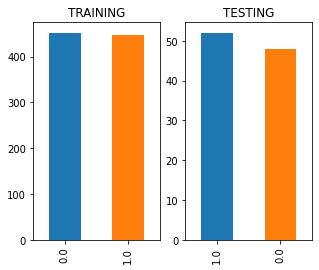

In [11]:
print(y_train.value_counts()) #mnmpilkn jum.data y_train brdsrkn value        

print(y_test.value_counts())  #mnmpilkn jum.data y_test brdsrkn value


plt.figure(figsize=(5,4)) #mngtur ukuran skla grafik

#mnmpilkn visualisasi grafik
plt.subplot(1,2,1);y_train.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TRAINING')
plt.subplot(1,2,2);y_test.value_counts().plot(kind='bar', color=['C0','C1','C2','C3','C4','C5','C6']);plt.title('TESTING')

In [12]:
#scaling data
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)

x_test = sc_x.transform(x_test)
x_train

array([[-0.88547217, -0.78988262, -0.28606817, ..., -0.1930507 ,
        -0.25980677,  0.98802647],
       [-1.23946556,  0.37851266, -1.00453439, ..., -0.38623865,
         0.55049355,  0.2164253 ],
       [ 0.67074486,  0.4062124 , -0.02066177, ...,  0.06723495,
         0.06475671,  0.15360903],
       ...,
       [-0.69925677, -1.03853259, -1.28735282, ..., -0.65871327,
        -0.5587954 ,  0.01703815],
       [-1.91284309, -1.78652473, -1.05049932, ..., -0.68330238,
        -1.18759803,  0.13775785],
       [-0.74478655, -1.52953277,  1.17293233, ..., -0.51487628,
        -1.042272  ,  0.48139571]])

In [13]:
math.sqrt(len(y_train))

30.0

In [14]:
#choose method knn and fitting
classifier = KNeighborsClassifier(n_neighbors=30,p=2,metric='manhattan')
classifier.fit (x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=None, n_neighbors=30, p=2,
                     weights='uniform')

In [15]:
#proses testing

#hasil prediksi/testing dismpn ke (y_pred)
y_pred = classifier.predict(x_test)
y_pred

array([0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0.,
       1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 1., 0.])

In [16]:
#print result
cm = confusion_matrix(y_test, y_pred)
print (cm)
print("Akurasi :" , accuracy_score(y_test, y_pred))
print("presisi :" , precision_score(y_test, y_pred, average=None))
print("recall :" , recall_score(y_test, y_pred, average=None))
print("F-Measure :" , f1_score(y_test, y_pred, average=None))

[[44  4]
 [ 0 52]]
Akurasi : 0.96
presisi : [1.         0.92857143]
recall : [0.91666667 1.        ]
F-Measure : [0.95652174 0.96296296]


In [0]:
from matplotlib import pyplot as plt
x = ["K3", "K4", "K5", "K6", "K7", "K8", "K9", "K10"]
a = [79, 82, 84, 81, 83, 82, 81, 84]
p = [73, 83, 75, 78, 76, 78, 72, 80]
r = [81, 75, 96, 80, 90, 81, 91, 84]
f = [77, 79, 84, 79, 83, 80, 81, 82]
plt.plot(x, a, '--')
plt.plot(x, p, '--')
plt.plot(x, r, '--')
plt.plot(x, f, '--')
plt.title("Grafik Result")
plt.xlabel("Nilai K")
plt.ylabel("Performa")
plt.legend(["Akurasi", "Presisi", "Recall", "F-measure"])
plt.grid()
plt.show()

In [17]:
akurasi = 0
for x in range(2,900): 
    #choose method and fitting
    classifier = KNeighborsClassifier(n_neighbors=x,p=2,metric='euclidean')
    classifier.fit(x_train, y_train)

    #testing data
    y_pred = classifier.predict(x_test)

    #print result
    cm = confusion_matrix(y_test, y_pred)
    tertinggi = accuracy_score(y_test, y_pred)
    if tertinggi >= akurasi:
        akurasi = tertinggi
        cmx = cm
        k = x
        a = accuracy_score(y_test, y_pred)
        p = precision_score(y_test, y_pred,average=None)
        r = recall_score(y_test, y_pred,average=None)
        f = f1_score(y_test, y_pred,average=None)
print("K :" , k)
print(cmx)
print("Akurasi :" , a)
print("presisi :" , p)
print("recall :" , r)
print("F-Score :" , f)
print("--------------------------------------------")

K : 6
[[47  1]
 [ 0 52]]
Akurasi : 0.99
presisi : [1.         0.98113208]
recall : [0.97916667 1.        ]
F-Score : [0.98947368 0.99047619]
--------------------------------------------
